## *Laboratorio 2, parte 2*
Daniel Behar, Cruz del Cid

## Escalamiento Multidimensional

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Extraccion de datos y procesamiento

data = pd.read_csv("datasets/crimes.csv")

names = list(data.loc[:,"Crime"])
print(names)

datos = data.iloc[:,2:9]
datos = np.array(datos)
print(datos)

['Murder', 'Rape', 'Robbery', 'Assault', 'Burglary', 'Larceny', 'Auto theft']
[[1.   0.52 0.34 0.81 0.28 0.06 0.11]
 [0.52 1.   0.55 0.7  0.68 0.6  0.44]
 [0.34 0.55 1.   0.56 0.62 0.44 0.62]
 [0.81 0.7  0.56 1.   0.52 0.32 0.33]
 [0.28 0.68 0.62 0.52 1.   0.8  0.7 ]
 [0.06 0.6  0.44 0.32 0.8  1.   0.55]
 [0.11 0.44 0.62 0.33 0.7  0.55 1.  ]]


In [3]:
# Construyendo la matriz de proyeccion J
n = datos.shape[0]
J = np.eye(n) - (1./n)*np.ones((n,n))
print(np.round(J,3))

[[ 0.857 -0.143 -0.143 -0.143 -0.143 -0.143 -0.143]
 [-0.143  0.857 -0.143 -0.143 -0.143 -0.143 -0.143]
 [-0.143 -0.143  0.857 -0.143 -0.143 -0.143 -0.143]
 [-0.143 -0.143 -0.143  0.857 -0.143 -0.143 -0.143]
 [-0.143 -0.143 -0.143 -0.143  0.857 -0.143 -0.143]
 [-0.143 -0.143 -0.143 -0.143 -0.143  0.857 -0.143]
 [-0.143 -0.143 -0.143 -0.143 -0.143 -0.143  0.857]]


In [5]:
# Calculando la matriz de Gram
G = -0.5* J @ datos @ J
print(np.round(G,2))

[[-0.34 -0.    0.06 -0.17  0.12  0.18  0.15]
 [-0.   -0.15  0.05 -0.01  0.02  0.    0.08]
 [ 0.06  0.05 -0.2   0.03  0.03  0.06 -0.03]
 [-0.17 -0.01  0.03 -0.18  0.08  0.13  0.12]
 [ 0.12  0.02  0.03  0.08 -0.13 -0.09 -0.04]
 [ 0.18  0.    0.06  0.13 -0.09 -0.25 -0.02]
 [ 0.15  0.08 -0.03  0.12 -0.04 -0.02 -0.25]]


## SVD

In [6]:
U, S, V = np.linalg.svd(G)

In [7]:
print(np.round(U, 3))
print('')
print(np.round(S, 3))
print('')
print(np.round(V, 3))

[[-0.637  0.005 -0.36   0.223 -0.301  0.426  0.378]
 [-0.088 -0.379  0.357 -0.738 -0.106  0.151  0.378]
 [ 0.073  0.583  0.654  0.241 -0.122  0.107  0.378]
 [-0.428 -0.011  0.01   0.052  0.381 -0.725  0.378]
 [ 0.285 -0.172 -0.099  0.183  0.724  0.424  0.378]
 [ 0.416 -0.506 -0.009  0.413 -0.444 -0.245  0.378]
 [ 0.379  0.48  -0.553 -0.375 -0.132 -0.138  0.378]]

[0.719 0.318 0.177 0.127 0.083 0.07  0.   ]

[[ 0.637  0.088 -0.073  0.428 -0.285 -0.416 -0.379]
 [-0.005  0.379 -0.583  0.011  0.172  0.506 -0.48 ]
 [ 0.36  -0.357 -0.654 -0.01   0.099  0.009  0.553]
 [-0.223  0.738 -0.241 -0.052 -0.183 -0.413  0.375]
 [ 0.301  0.106  0.122 -0.381 -0.724  0.444  0.132]
 [-0.426 -0.151 -0.107  0.725 -0.424  0.245  0.138]
 [-0.378 -0.378 -0.378 -0.378 -0.378 -0.378 -0.378]]


#### Proyección a dos componente principales

In [9]:
P = datos @ V.T[:,:2]
P

array([[ 0.85821071,  0.02897174],
       [ 0.06843137,  0.27295493],
       [-0.16299937, -0.33846526],
       [ 0.55839098,  0.03906514],
       [-0.46759718,  0.14114098],
       [-0.65675518,  0.35339935],
       [-0.60231354, -0.27333883]])

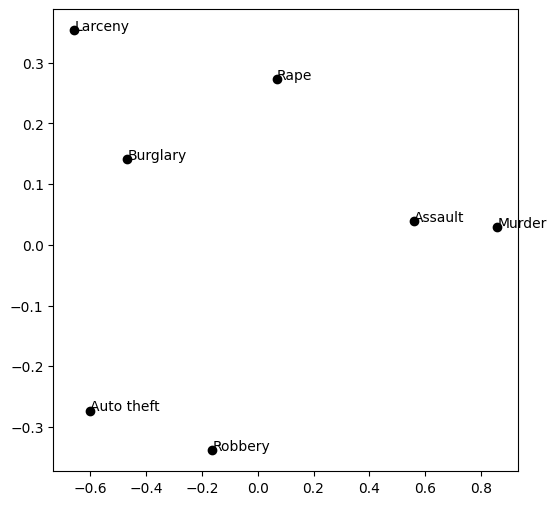

In [10]:
plt.figure(figsize=(6,6))
plt.plot(P[:,0], P[:,1], 'ko')
for i in np.arange(0, P.shape[0]):
    plt.annotate(names[i], (P[i,0], P[i,1]))
plt.show()

### Definiones que manejaremos con los tipos de crimenes:
- Larceny: robo de propiedad sin entrar a una casa (ej: robo de bolso en un centro comercial)
- Burglary: robo de objetos pequeños estilo pit pocket (ej: robo de anillos dentro de un bolso)
- Rape: violaciones
- Assault: robo de propiedad a mano armada
- Murder: asesinato
- Auto Theft: robo de vehiculos
- Robbery: robos de lugares

Interpretaciones:
- X: mas negativo implica que es mas secreto y mas positivo implica que es evidente para la victima. Un robo mas secreto implica que el criminal no quiere que la victima se de cuenta del atraco y el derecho es imposible que la victima no se entere
- Y: mas negativo implica que la victima no necesariamente esta alli y mas positivo que la victima si estaba presente en el momento

Por ejemplo, rape esta en el limite de X porque si la persona estaba drogada, hay probabilidades de que no se de cuenta totalmente de lo que paso, pero despues si será evidente la violacion